# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


In [16]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784')
x, y = mnist["data"], mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### peek at one digit

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

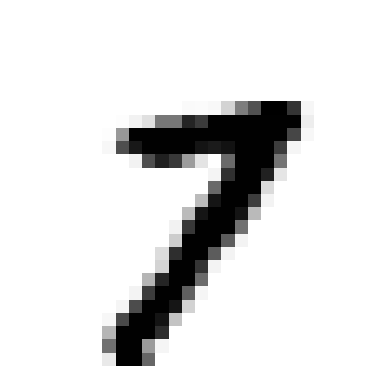

In [18]:
some_digit = np.array(x.iloc[40000])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [19]:
import numpy as np 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.loc[shuffle_index], y_train.loc[shuffle_index]

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [22]:
# CODE HERE
sgd_clf.fit(x_train,y_train)

SGDClassifier(random_state=42)

#### Call decision_function() method to return score for each instance 

In [26]:
# CODE HERE
decision_scores = sgd_clf.decision_function(some_digit.reshape(1, -1))
decision_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-60662.16800139, -11458.59711082, -14969.59873885,
         -9743.72459471, -22718.4774459 , -17876.57981248,
        -43063.1002852 ,   6941.3818903 ,  -9888.90373872,
         -5358.08215054]])

#### find highest score 

In [27]:
# CODE HERE
highest_score_index = np.argmax(decision_scores)
highest_score_index

7

#### list the target classes

In [28]:
# CODE HERE
target_classes = sgd_clf.classes_
print(target_classes)


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


#### Find the the target class for 7

In [31]:
# CODE HERE
# if you got stuck use GOOGLE
target_classes[7]

'7'

#### Force ScikitLearn to use one-versus-one

In [32]:
from sklearn.multiclass import OneVsOneClassifier

In [33]:
# CODE HERE
sgd_clf = SGDClassifier(random_state=42)

# Create a OneVsOneClassifier and train it on the training data
ovo_clf = OneVsOneClassifier(sgd_clf)
ovo_clf.fit(x_train, y_train)

# Now you can use the trained classifier to make predictions on the test data
predictions = ovo_clf.predict(some_digit.reshape(1, -1))
predictions 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array(['7'], dtype=object)

#### find how many classifier OvO used

In [36]:
# CODE HERE
# n*(n-1)/2 = 10*(10-1)/2

10*(10-1)/2

45.0

In [35]:
num_classifiers = len(ovo_clf.estimators_)
print(num_classifiers)

45


#### Train  RandomForestClassifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [39]:
# CODE HERE
forest_clf.fit(x_train, y_train)
# Now you can use the trained classifier to make predictions on the test data
predictions = forest_clf.predict(some_digit.reshape(1, -1))
predictions 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['7'], dtype=object)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [41]:
forest_clf.predict_proba([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

#### Find accurcy using cross validation score ()

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# CODE HERE
scores = cross_val_score(forest_clf, x_train, y_train, cv=3)

# Print the scores
print(scores)

[0.96515 0.966   0.9654 ]


#### to get better accurcy try scaling input

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# CODE HERE
# The scaling not necessary for RF model
# but this the code

scaler = StandardScaler()

# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(x_train)

# Train your model on the scaled data
forest_clf.fit(X_train_scaled, y_train)

# If you want to make predictions on new data, don't forget to scale it first
some_digit_scaled = scaler.transform(some_digit.reshape(1, -1))
predictions = forest_clf.predict(some_digit_scaled)

# To assess the accuracy, perform cross-validation on the scaled training set
scores = cross_val_score(forest_clf, X_train_scaled, y_train, cv=5)

print(scores)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.96708333 0.9665     0.96675    0.96716667 0.96975   ]


## Error Analysis

#### Take a look at the confusion matrix

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [49]:
# CODE HERE
y_pred = forest_clf.predict(scaler.transform(x_test))

# Now you can compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[ 969    0    1    0    0    2    3    1    4    0]
 [   0 1124    1    2    1    3    2    0    1    1]
 [   7    0 1001    4    2    0    3    8    7    0]
 [   0    0   13  975    0    3    0    8    8    3]
 [   1    0    1    0  953    0    6    0    2   19]
 [   4    0    0   15    3  856    6    1    5    2]
 [   8    3    0    0    4    2  939    0    2    0]
 [   1    2   20    2    2    0    0  989    4    8]
 [   4    0    3    8    4    4    6    5  931    9]
 [   5    5    2   12   15    2    1    5    3  959]]


#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

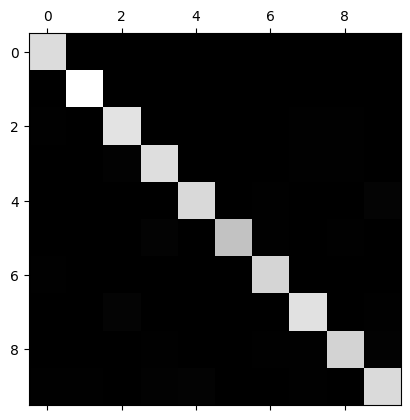

In [50]:
# CODE HERE
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [51]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

#### fill the diagonal with zeros to keep only the errors

In [52]:
# CODE HERE
np.fill_diagonal(norm_conf_mx, 0)

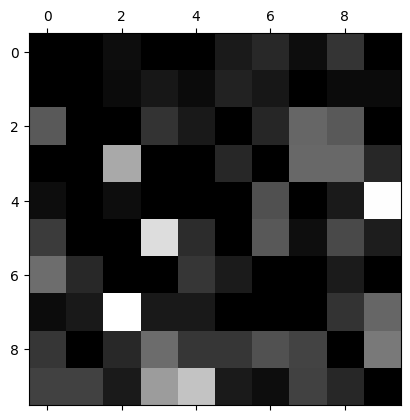

In [53]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [63]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [101]:
cl_a, cl_b = '3', '5'

X_aa = x_test[(y_test == cl_a) & (y_pred == cl_a)]
X_ab = x_test[(y_test == cl_a) & (y_pred == cl_b)]
X_ba = x_test[(y_test == cl_b) & (y_pred == cl_a)]
X_bb = x_test[(y_test == cl_b) & (y_pred == cl_b)]


In [102]:
print(type(X_aa[:25]), X_aa[:25].shape)
print(type(X_ab[:25]), X_ab[:25].shape)
print(type(X_ba[:25]), X_ba[:25].shape)
print(type(X_bb[:25]), X_bb[:25].shape)

<class 'pandas.core.frame.DataFrame'> (25, 784)
<class 'pandas.core.frame.DataFrame'> (3, 784)
<class 'pandas.core.frame.DataFrame'> (15, 784)
<class 'pandas.core.frame.DataFrame'> (25, 784)


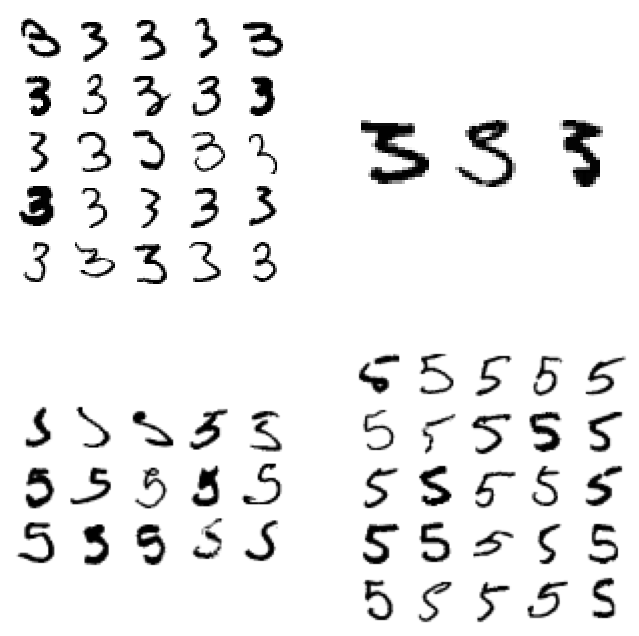

In [113]:
plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25].values, images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25].values, images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25].values, images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].values, images_per_row=5)

plt.show()

## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [118]:
from sklearn.neighbors import KNeighborsClassifier
# to make larger operation then convert to int
y_train_int = y_train.astype(int)
y_train_large = ((y_train_int  >= 7))
y_train_odd = (y_train_int == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [119]:
# CODE HERE
y_test_int = y_test.astype(int)
knn_clf.predict(x_test)

array([[ True, False],
       [False, False],
       [False,  True],
       ...,
       [False, False],
       [False, False],
       [False, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [120]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

In [121]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_train_int, cv=3)

In [124]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_int, y_train_knn_pred, average="macro")
print("F1 Score: ", f1)

F1 Score:  0.9682297692008254


## Multioutput Classification


In [125]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### Let’s take a peek at an image from the test set

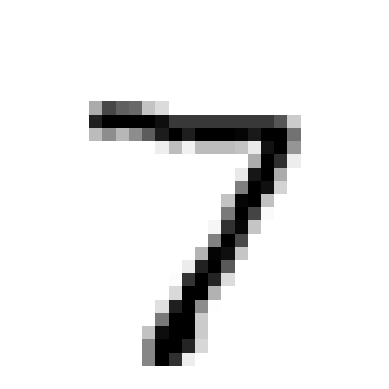

In [127]:
# CODE HERE
image_instance = x_test.iloc[0].values  # If x_test is a DataFrame

# Reshape it to a 28x28 array:
image_instance = image_instance.reshape(28, 28)

# Use imshow to display the image:
plt.imshow(image_instance, cmap='binary')
plt.axis('off')  # Optional: remove axes for visual clarity
plt.show()

# Congrats you've finished your first classification Project🥳 !
# #shAI_Club